<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:


import pandas as pd
import warnings
import numpy as np
warnings.simplefilter('ignore')
from scipy import stats as st
%matplotlib inline

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

from sklearn.model_selection import (
     GridSearchCV, 
    RandomizedSearchCV,
    train_test_split
)
import lightgbm
import re
from sklearn.compose import make_column_transformer

from sklearn.pipeline import make_pipeline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer


from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords as nltk_stopwords

from sklearn.feature_extraction.text import TfidfVectorizer 

from lightgbm import LGBMClassifier


from sklearn.linear_model import LogisticRegression


from tqdm import notebook

from sklearn.model_selection import cross_val_score



stopwords = set(nltk_stopwords.words('english'))
from sklearn.linear_model import LogisticRegression


from tqdm import notebook
from sklearn.metrics import f1_score
nltk.download('averaged_perceptron_tagger')
# import sys
# !{sys.executable} -m pip install spacy
# # Download spaCy's  'en' Model
# !{sys.executable} -m spacy download en
# import spacy
# # Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
# nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |██████████████████████▉         | 9.9 MB 7.2 kB/s eta 0:09:17ERROR: Exception:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/opt/conda/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/opt/conda/lib/python3.9/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "/opt/conda/lib/python3.9/http/client.py", line 455, in read
    n = self.readinto(b)
  File "/opt/conda/lib/python3.9/http/client.py", line 499, in readinto
    n = self.fp.readinto(b)
  File "/opt/conda/lib/python3.9/socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "/opt/conda/lib/python3.9/ssl.py", line 124

In [3]:
try :
    data= pd.read_csv('/datasets/toxic_comments.csv', index_col=[0])
    
except:
    data  = pd.read_csv('toxic_comments.csv', index_col=[0])

display(data.head(10))

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


In [4]:
display(data['toxic'].value_counts())

0    143106
1     16186
Name: toxic, dtype: int64

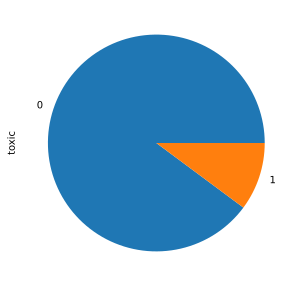

In [5]:
data['toxic'].value_counts().plot(
    kind='pie', 
    figsize=(10, 5), 
    legend=False, 
   
)
plt.show()


видим что существует дисбаланс классов 

In [6]:
# Lemmatize with POS Tag

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


In [7]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    text = text.lower()
    lemm_text = " ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)])
    cleared_text = re.sub(r'[^a-zA-Z]', ' ', lemm_text) 
    return " ".join(cleared_text.split())



In [8]:
data['lemm_text'] = data['text'][:5].apply(lemmatize_text)

data = data.drop(['text'], axis=1)

In [9]:
data.head()

,toxic,lemm_text
0,0,explanation why the edits make under my userna...
1,0,d aww he match this background colour i m seem...
2,0,hey man i m really not try to edit war it s ju...
3,0,more i ca n t make any real suggestion on impr...
4,0,you sir be my hero any chance you remember wha...


In [ ]:
display(data.head(10))

In [ ]:
target = data['toxic']
features = data.drop(['toxic'], axis=1)


In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                              target, 
                                                                              test_size=0.2, 
                                                                              random_state=1234)

In [ ]:


count_tf_idf = TfidfVectorizer(stop_words=stopwords)
features_train = count_tf_idf.fit_transform(features_train['lemm_text'].values)

features_test = count_tf_idf.transform(features_test['lemm_text'].values)
print(features_train.shape)

print(features_test.shape)

In [ ]:


model_lr = LogisticRegression()
model_LGBM= LGBMClassifier(class_weight='balanced') 
n_iter_search = 12 

Данные были загружены , разделены на обучающую и тестовую выборку , также был выявлен дисбаланс класссов ,была проведена лемметизация текста

## Обучение

In [ ]:
model = LogisticRegression(random_state=1234, class_weight='balanced')

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [10,20,40,60, 100],
}

search_lr = GridSearchCV(model, param_grid, cv=5, verbose=1, scoring='f1')
search_lr.fit(features_train, target_train)

print(search_lr.best_score_)

In [ ]:
print(search_lr.best_params_)

In [ ]:
classificator = LogisticRegression(random_state=1234,C=10,max_iter=100)
train_f1 = cross_val_score(classificator, 
                      features_train, 
                      target_train, 
                      cv=3, 
                      scoring='f1').mean()
print('F1 на CV', train_f1)

In [ ]:
classificator = LogisticRegression(random_state=1234,C=10,max_iter=100,class_weight='balanced')
train_f1 = cross_val_score(classificator, 
                      features_train, 
                      target_train, 
                      cv=3, 
                      scoring='f1').mean()
print('F1 на CV', train_f1)

Видим что логистическая регрессия с сбалансированными весами классов показывает себя лучше

In [ ]:
%%time
parameters_LGBM={'num_leaves':[31, 100, 200], 
                'learning_rate':[0.1, 0.3, 0.5,0.6,0.8,1],
                'random_state':[12345]
                }


random_search = RandomizedSearchCV(model_LGBM, 
                                   param_distributions=parameters_LGBM, 
                                   n_iter=5, 
                                   cv=31, 
                                   scoring = 'f1',
                                   
                                      ) 
random_search.fit(features_train, target_train) 
LGBM_final =random_search.best_score_
print("Лучшие параметры: {}".format(random_search.best_params_)) 
print("Лучшая оценка : {}".format(random_search.best_score_))

In [ ]:
print('Лучший результат в модели LGBM',random_search.best_score_)

In [ ]:
model_LGBM= LGBMClassifier(random_state= 12345,num_leaves=200,learning_rate=0.1)

train_f1 = cross_val_score(model_LGBM, 
                      features_train, 
                      target_train, 
                      cv=3, 
                      scoring='f1').mean()
print('F1 на CV', train_f1)

In [ ]:
index = ['LinearRegression',
         
         
        
         
         'LGBMRegressor',
         
        ]
d = {'f1 модели ':[ 0.769,
                                          0.765,
                                                
                                              ]
   }
scores_data = pd.DataFrame(data=d, index=index)

In [ ]:
display(scores_data)

LGBMRegressor показал чуть худшие резульатты при более значительных вычислительных затратах чем линейная регрессия

Проверим результаты модели на тестовой выборке

In [ ]:
classificator.fit(features_train, target_train)
target_predict = classificator.predict(features_test)
test_f1_LR = f1_score(target_test, target_predict)

print('F1 на тестировании', test_f1_LR)

In [ ]:

pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer()),
        ("logreg", LogisticRegression(random_state=1234, class_weight='balanced')),
    ]
)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [10,20,40,60, 100],
}
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parameter_grid,
    n_iter=40,
    random_state=1234,
    n_jobs=2,
    verbose=1,
)
random_search.fit(features, target) 

print("Лучшие параметры: {}".format(random_search.best_params_)) 
print("Лучшая оценка : {}".format(random_search.best_score_))

## Выводы

Вывод
В ходе работы было сделано:

-Подготовленны данные обучения.

-Установлен дисбаланс классов и выбран способ решения проблемы, сформированы обучающая, и тестовая выборка.
 -Обучены модели и выбрана лучшая из них 

-Показаны параметры качества моделей.

-Далее лучшая модель LogisticRegression протестирована на тестовой выборке с F1 на тестировании 0.77



## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [ ]  Выводы написаны